Keçeci Layout

directions = ['top_down', 'bottom_up', 'left-to-right', 'right-to-left']
primary_direction (str): 'top_down', 'bottom_up', 'left-to-right', 'right-to-left'.
secondary_start (str): Initial direction for the zigzag ('up', 'down', 'left', 'right').

Advanced Drawing Styles

Use draw_kececi for enhanced visualizations:

kl.draw_kececi(G, style='curved')        # Smooth curved edges
kl.draw_kececi(G, style='transparent')   # Opacity based on edge length
kl.draw_kececi(G, style='3d')            # 3D helix layout

Drawing Styles

KeçeciLayout supports advanced visualization styles.
    
Curved Edges

Edges are drawn as arcs.

kl.draw_kececi(G, style='curved', node_color='skyblue')

Transparent Edges

Edge opacity depends on length.

kl.draw_kececi(G, style='transparent', node_color='purple')

3D Helix

Nodes are placed in a 3D spiral.

kl.draw_kececi(G, style='3d', ax=plt.figure().add_subplot(projection='3d'))

layouts = ['2d', 'cylindrical', 'cubic', 'spherical', 'elliptical', 'toric'] 

styles = ['standard', 'default', 'curved', 'helix', '3d', 'weighted', 'colored']


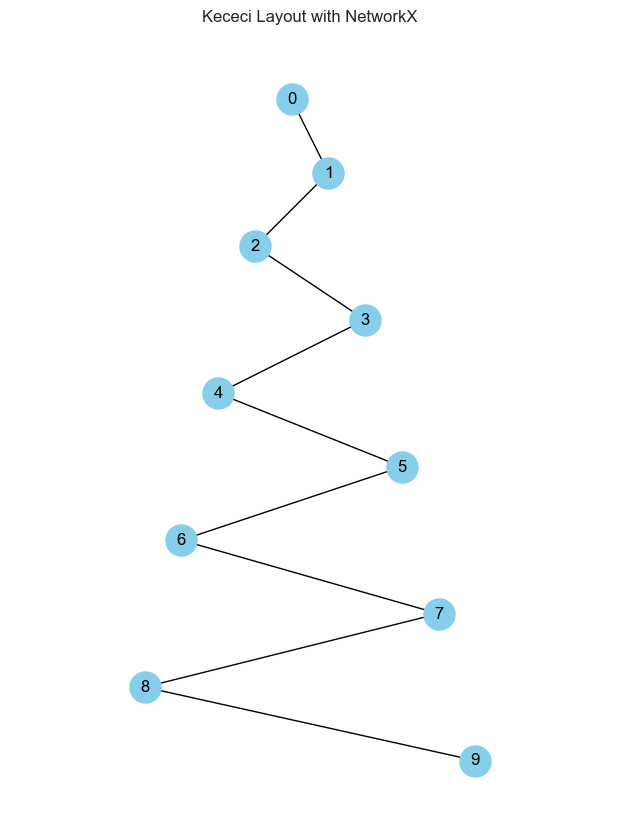

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import kececilayout as kl

G = nx.path_graph(10)
pos = kl.kececi_layout(
    G,
    primary_spacing=1.0,
    secondary_spacing=0.5,
    primary_direction='top_down',
    secondary_start='right'
)

plt.figure(figsize=(6, 8))
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=500)
plt.title("Kececi Layout with NetworkX")
plt.axis('equal')
plt.show()


--- NetworkX Example ---
NetworkX graph generated: 10 nodes, 9 edges
Calculating Keçeci Layout...


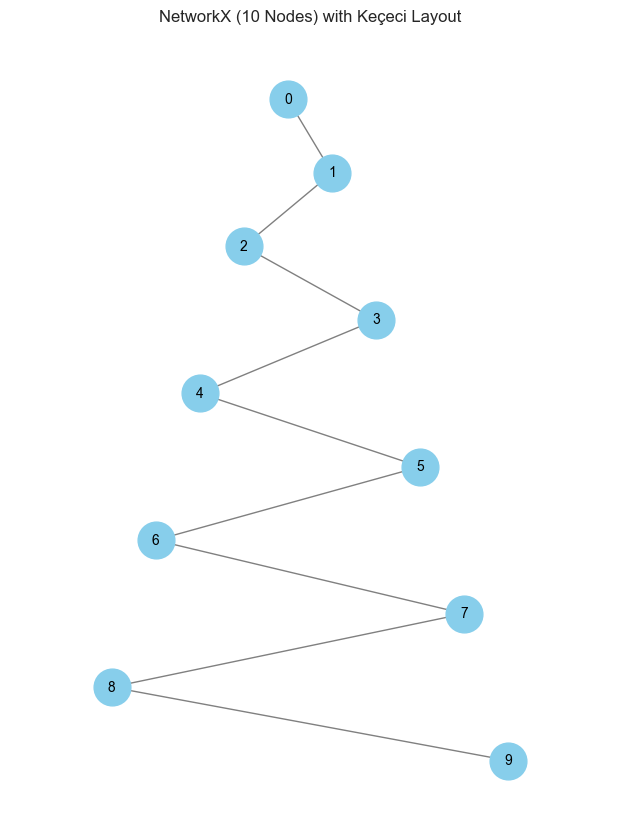


--- NetworkX Example Finished ---


In [3]:
import matplotlib.pyplot as plt
import math
import networkx as nx
import kececilayout as kl
import random

try:
    import kececilayout as kl
except ImportError:
    print("Error: 'kececi_layout.py' not found or could not be imported.")
    print("Please ensure the file containing kececi_layout_v4 is accessible.")
    exit()

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6, # Make the zigzag noticeable
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}
N_NODES = 10 # Number of nodes in the example graph

# === NetworkX Example ===
try:
    import networkx as nx
    print("\n--- NetworkX Example ---")

    # Generate graph (Path graph)
    G_nx = nx.path_graph(N_NODES)
    print(f"NetworkX graph generated: {G_nx.number_of_nodes()} nodes, {G_nx.number_of_edges()} edges")

    # Calculate layout
    print("Calculating Keçeci Layout...")
    # Call the layout function from the imported module
    pos_nx = kl.kececi_layout_v4(G_nx, **LAYOUT_PARAMS)
    # print("NetworkX positions:", pos_nx) # Debug print if needed

    # Plot
    plt.figure(figsize=(6, 8)) # Suitable figure size for vertical layout
    nx.draw(G_nx,               # NetworkX graph object
            pos=pos_nx,         # Positions calculated by Kececi Layout
            with_labels=True,   # Show node labels (indices)
            node_color='skyblue',# Node color
            node_size=700,      # Node size
            font_size=10,       # Label font size
            edge_color='gray')  # Edge color

    plt.title(f"NetworkX ({N_NODES} Nodes) with Keçeci Layout") # Plot title
    plt.xlabel("X Coordinate") # X-axis label
    plt.ylabel("Y Coordinate") # Y-axis label
    plt.axis('equal')       # Ensure equal aspect ratio for correct spacing perception
    plt.grid(False)         # Ensure grid is off
    plt.show()              # Display the plot

except ImportError:
    print("NetworkX is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the NetworkX example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- NetworkX Example Finished ---")

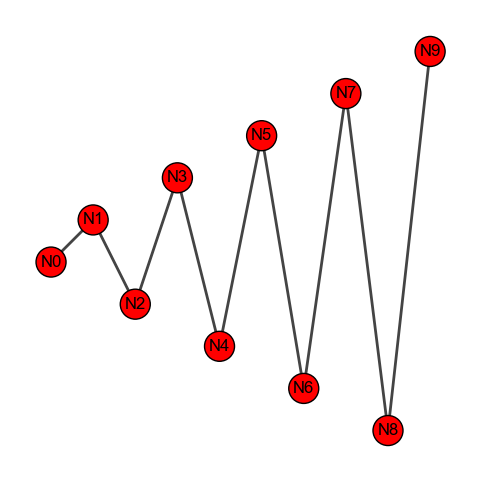

In [4]:
import igraph as ig
import matplotlib.pyplot as plt
import kececilayout as kl

G = ig.Graph.Ring(10, circular=False)

# Convert igraph to NetworkX first, then apply kececi_layout
import networkx as nx
nx_graph = nx.Graph()
nx_graph.add_nodes_from([v.index for v in G.vs])
nx_graph.add_edges_from(G.get_edgelist())

# Apply kececi layout to NetworkX graph
pos = kl.kececi_layout(nx_graph, primary_direction='left-to-right', secondary_start='up')

# Convert positions to igraph layout format
pos_list = [pos[i] for i in range(G.vcount())]
layout = ig.Layout(pos_list)

fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(G, target=ax, layout=layout, vertex_label=[f"N{i}" for i in range(G.vcount())])
ax.set_aspect('equal')
plt.show()

Graph has 10 vertices and 9 edges
kececi_layout returned: {0: (0.0, 0.0), 1: (1.0, 1.0), 2: (2.0, -1.0), 3: (3.0, 2.0), 4: (4.0, -2.0), 5: (5.0, 3.0), 6: (6.0, -3.0), 7: (7.0, 4.0), 8: (8.0, -4.0), 9: (9.0, 5.0)}
Type: <class 'dict'>
Length: 10
First element: (0.0, 0.0)
NetworkX graph has 10 nodes and 9 edges
Layout positions type: <class 'dict'>
Positions are in dictionary format


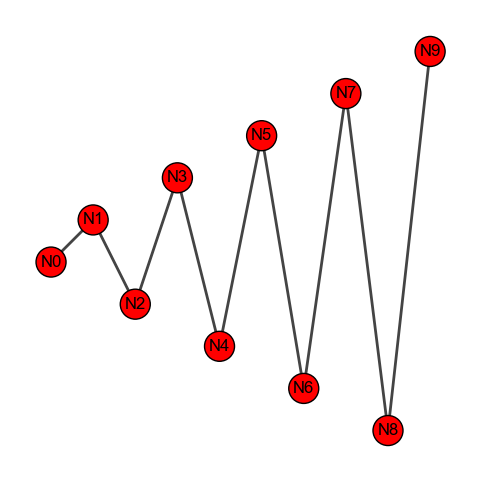

In [5]:
import igraph as ig
import matplotlib.pyplot as plt
import kececilayout as kl

G = ig.Graph.Ring(10, circular=False)
print(f"Graph has {G.vcount()} vertices and {G.ecount()} edges")

# Debug: Check what kececi_layout returns
try:
    result = kl.kececi_layout(G, primary_direction='left-to-right', secondary_start='up')
    print(f"kececi_layout returned: {result}")
    print(f"Type: {type(result)}")
    
    if hasattr(result, '__iter__'):
        print(f"Length: {len(result)}")
        print(f"First element: {result[0] if len(result) > 0 else 'N/A'}")
    
except Exception as e:
    print(f"Error in kececi_layout: {e}")

# Safe approach using NetworkX conversion
import networkx as nx
nx_graph = nx.Graph()
nx_graph.add_nodes_from(range(G.vcount()))
nx_graph.add_edges_from(G.get_edgelist())

print(f"NetworkX graph has {nx_graph.number_of_nodes()} nodes and {nx_graph.number_of_edges()} edges")

pos = kl.kececi_layout(nx_graph, primary_direction='left-to-right', secondary_start='up')
print(f"Layout positions type: {type(pos)}")

if isinstance(pos, dict):
    print("Positions are in dictionary format")
    pos_list = [pos[i] for i in range(G.vcount())]
else:
    print("Positions are in list format")
    pos_list = pos

layout = ig.Layout(pos_list)

fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(G, target=ax, layout=layout, vertex_label=[f"N{i}" for i in range(G.vcount())])
ax.set_aspect('equal')
plt.show()

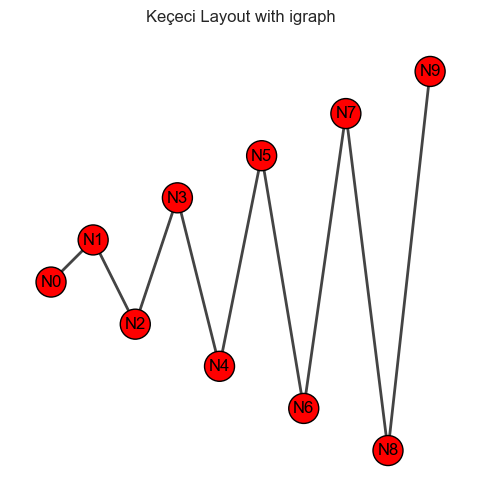

In [6]:
import igraph as ig
import matplotlib.pyplot as plt
import kececilayout as kl

G = ig.Graph.Ring(10, circular=False)

# Get the positions using kececi_layout with proper conversion
try:
    # Method 1: Direct conversion
    pos = kl.kececi_layout(G, primary_direction='left-to-right', secondary_start='up')
    
    # If pos is not iterable, it might be returning an error code
    if not hasattr(pos, '__iter__'):
        raise TypeError("kececi_layout returned non-iterable object")
        
except (TypeError, AttributeError) as e:
    print(f"Direct approach failed: {e}")
    print("Using NetworkX conversion method...")
    
    # Method 2: Convert to NetworkX first
    import networkx as nx
    nx_graph = nx.Graph()
    nx_graph.add_nodes_from(range(G.vcount()))
    nx_graph.add_edges_from(G.get_edgelist())
    
    pos = kl.kececi_layout(nx_graph, primary_direction='left-to-right', secondary_start='up')

# Ensure we have proper coordinates
if isinstance(pos, dict):
    # Convert dictionary to list
    pos_list = [pos[i] for i in range(G.vcount())]
else:
    # Assume it's already a list of coordinates
    pos_list = pos

layout = ig.Layout(pos_list)

fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(G, 
        target=ax, 
        layout=layout, 
        vertex_label=[f"N{i}" for i in range(G.vcount())],
        vertex_size=30,
        edge_width=2,
        margin=50)

ax.set_title("Keçeci Layout with igraph")
ax.set_aspect('equal')
plt.show()


--- igraph Example ---
igraph graph generated: 10 vertices, 9 edges
Calculating Keçeci Layout...
Plotting graph using igraph.plot...


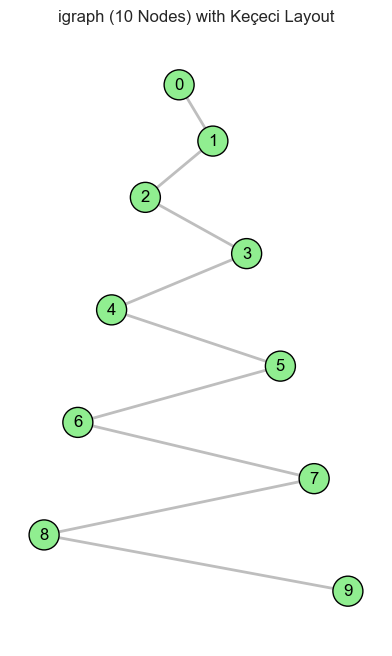


--- igraph Example Finished ---


In [7]:
import matplotlib.pyplot as plt
import math
import igraph as ig
import kececilayout as kl


try:
    import kececilayout as kl
except ImportError:
    print("Error: 'kececi_layout.py' not found or could not be imported.")
    print("Please ensure the file containing kececi_layout_v4 is accessible.")
    exit()

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6, # Make the zigzag noticeable
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}
N_NODES = 10 # Number of nodes in the example graph

# === igraph Example ===
try:
    import igraph as ig
    print("\n--- igraph Example ---")

    # Generate graph (Path graph using Ring(circular=False))
    G_ig = ig.Graph.Ring(N_NODES, directed=False, circular=False)
    print(f"igraph graph generated: {G_ig.vcount()} vertices, {G_ig.ecount()} edges")

    # Calculate layout
    print("Calculating Keçeci Layout...")
    # Call the layout function from the imported module
    pos_ig = kl.kececi_layout_v4(G_ig, **LAYOUT_PARAMS)
    # print("igraph positions (dict):", pos_ig) # Debug print if needed

    # Convert positions dict to list ordered by vertex index for ig.plot
    layout_list_ig = []
    plot_possible = True
    if pos_ig: # Check if dictionary is not empty
        try:
            # Generate list: [pos_ig[0], pos_ig[1], ..., pos_ig[N-1]]
            layout_list_ig = [pos_ig[i] for i in range(G_ig.vcount())]
            # print("igraph layout (list):", layout_list_ig) # Debug print if needed
        except KeyError as e:
             print(f"ERROR: Key {e} not found while creating position list for igraph.")
             print("The layout function might not have returned positions for all vertices.")
             plot_possible = False # Cannot plot if list is incomplete
    else:
        print("ERROR: Keçeci Layout returned empty positions for igraph.")
        plot_possible = False

    # Plot using igraph's plotting capabilities
    print("Plotting graph using igraph.plot...")
    fig, ax = plt.subplots(figsize=(6, 8)) # Generate matplotlib figure and axes

    if plot_possible:
        ig.plot(G_ig,
                target=ax,           # Draw on the matplotlib axes
                layout=layout_list_ig, # Use the ORDERED LIST of coordinates
                vertex_label=[str(i) for i in range(G_ig.vcount())], # Labels 0, 1,...
                vertex_color='lightgreen',
                vertex_size=30,      # Note: igraph vertex_size scale differs
                edge_color='gray')
    else:
         ax.text(0.5, 0.5, "Plotting failed:\nMissing or incomplete layout positions.",
                 ha='center', va='center', color='red', fontsize=12) # Error message on plot

    ax.set_title(f"igraph ({N_NODES} Nodes) with Keçeci Layout") # Plot title
    ax.set_aspect('equal', adjustable='box') # Ensure equal aspect ratio
    # ax.grid(False) # Ensure grid is off
    plt.show()              # Display the plot

except ImportError:
    print("python-igraph is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the igraph example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- igraph Example Finished ---")


--- Rustworkx Example ---
Rustworkx graph generated: 10 nodes, 9 edges
Calculating Keçeci Layout...
Plotting graph using Matplotlib...


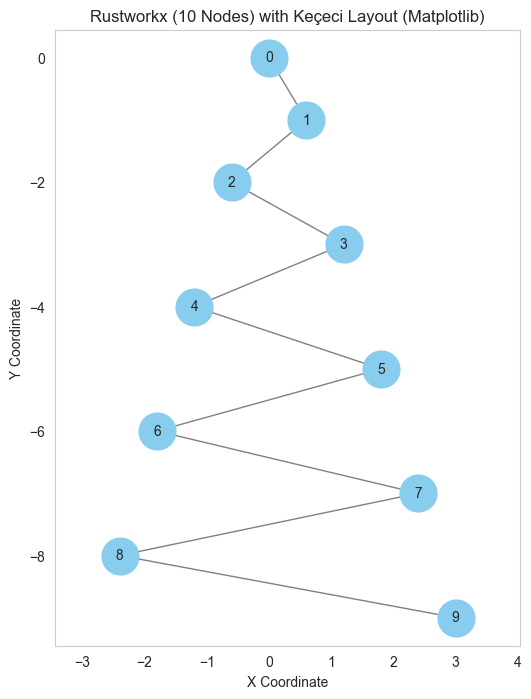


--- Rustworkx Example Finished ---


In [8]:
#Example with RustworkX

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection # Efficient edge drawing
import math
import rustworkx as rx
import kececilayout as kl
import random


try:
    import kececilayout as kl
except ImportError:
    print("Error: 'kececi_layout.py' not found or could not be imported.")
    print("Please ensure the file containing kececi_layout_v4 is accessible.")
    exit()

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6, # Make the zigzag noticeable
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}
N_NODES = 10 # Number of nodes in the example graph

# === Rustworkx Example ===
try:
    import rustworkx as rx
    print("\n--- Rustworkx Example ---")

    # Generate graph (Path graph)
    G_rx = rx.generators.path_graph(N_NODES)
    print(f"Rustworkx graph generated: {G_rx.num_nodes()} nodes, {G_rx.num_edges()} edges")

    # Calculate layout
    print("Calculating Keçeci Layout...")
    # Call the layout function from the imported module
    pos_rx = kl.kececi_layout_v4(G_rx, **LAYOUT_PARAMS)
    # print("Rustworkx positions:", pos_rx) # Debug print if needed

    # Plot using Matplotlib directly (Rustworkx doesn't have a built-in draw)
    print("Plotting graph using Matplotlib...")
    plt.figure(figsize=(6, 8))
    ax = plt.gca() # Get current axes

    node_indices_rx = G_rx.node_indices() # Get node indices [0, 1, ...]

    # Check if all nodes have positions
    if not all(idx in pos_rx for idx in node_indices_rx):
         print("ERROR: Rustworkx positions dictionary does not cover all nodes!")
         # Decide how to handle: exit, plot partial, etc.
    else:
        # Draw nodes
        x_coords_rx = [pos_rx[i][0] for i in node_indices_rx]
        y_coords_rx = [pos_rx[i][1] for i in node_indices_rx]
        ax.scatter(x_coords_rx, y_coords_rx, s=700, c='#88CCEE', zorder=2, label='Nodes') # Skyblue color

        # Draw labels
        for i in node_indices_rx:
            ax.text(pos_rx[i][0], pos_rx[i][1], str(i), ha='center', va='center', fontsize=10, zorder=3)

        # Draw edges using LineCollection for efficiency
        edge_lines = []
        for u, v in G_rx.edge_list(): # Get list of edges (node index pairs)
            if u in pos_rx and v in pos_rx:
                # Segment format: [(x1, y1), (x2, y2)]
                edge_lines.append([pos_rx[u], pos_rx[v]])
            else:
                print(f"Warning: Position not found for edge ({u},{v}) in Rustworkx graph.")

        if edge_lines:
            lc = LineCollection(edge_lines, colors='gray', linewidths=1.0, zorder=1, label='Edges')
            ax.add_collection(lc) # Add edges to the plot axes

    plt.title(f"Rustworkx ({N_NODES} Nodes) with Keçeci Layout (Matplotlib)") # Plot title
    plt.xlabel("X Coordinate") # X-axis label
    plt.ylabel("Y Coordinate") # Y-axis label
    plt.axis('equal')       # Ensure equal aspect ratio
    plt.grid(False)         # Ensure grid is off
    plt.show()              # Display the plot

except ImportError:
    print("Rustworkx is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the Rustworkx example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- Rustworkx Example Finished ---")


--- Networkit Example ---
Empty Networkit graph generated.
10 nodes added.
Networkit graph constructed: 10 nodes, 9 edges
Calculating Keçeci Layout...
Plotting graph using Matplotlib...


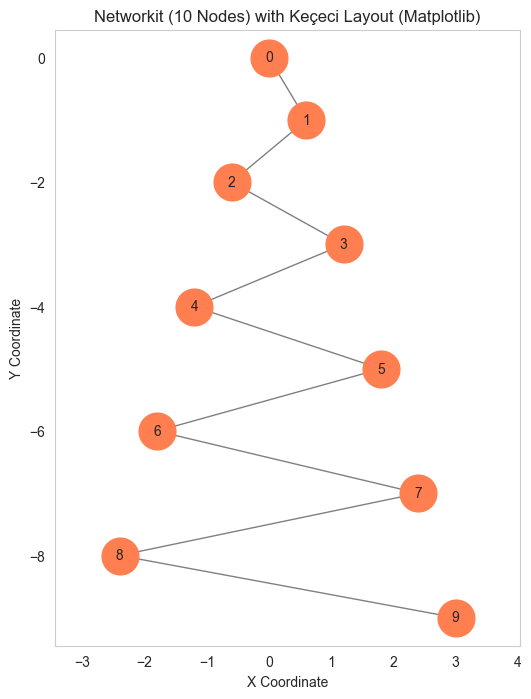


--- Networkit Example Finished ---


In [9]:
#Example with Networkit

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection # Efficient edge drawing
import math
import networkit as nk
import kececilayout as kl
import random

try:
    import kececilayout as kl
except ImportError:
    print("Error: 'kececi_layout.py' not found or could not be imported.")
    print("Please ensure the file containing kececi_layout_v4 is accessible.")
    exit()

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6, # Make the zigzag noticeable
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}
N_NODES = 10 # Number of nodes in the example graph

# === Networkit Example ===
try:
    import networkit as nk
    print("\n--- Networkit Example ---")

    # Generate graph (Path graph, manually)
    G_nk = nk.graph.Graph(N_NODES, weighted=False, directed=False) # Generate empty graph container
    print("Empty Networkit graph generated.")
    # Add nodes first (Networkit often requires this)
    for i in range(N_NODES):
        if not G_nk.hasNode(i): # Check if node already exists (good practice)
             G_nk.addNode()
    print(f"{G_nk.numberOfNodes()} nodes added.")
    # Add edges
    for i in range(N_NODES - 1):
        G_nk.addEdge(i, i+1) # Add edges 0-1, 1-2, ...
    print(f"Networkit graph constructed: {G_nk.numberOfNodes()} nodes, {G_nk.numberOfEdges()} edges")

    # Calculate layout
    print("Calculating Keçeci Layout...")
    # Call the layout function from the imported module
    pos_nk = kl.kececi_layout_v4(G_nk, **LAYOUT_PARAMS)
    # print("Networkit positions:", pos_nk) # Debug print if needed

    # Plot using Matplotlib directly (Networkit doesn't have a simple built-in draw)
    print("Plotting graph using Matplotlib...")
    plt.figure(figsize=(6, 8))
    ax = plt.gca() # Get current axes

    node_indices_nk = sorted(list(G_nk.iterNodes())) # Get node indices [0, 1, ...]

    # Check if all nodes have positions
    if not all(idx in pos_nk for idx in node_indices_nk):
         print("ERROR: Networkit positions dictionary does not cover all nodes!")
    else:
        # Draw nodes
        x_coords_nk = [pos_nk[i][0] for i in node_indices_nk]
        y_coords_nk = [pos_nk[i][1] for i in node_indices_nk]
        ax.scatter(x_coords_nk, y_coords_nk, s=700, c='coral', zorder=2, label='Nodes')

        # Draw labels
        for i in node_indices_nk:
            ax.text(pos_nk[i][0], pos_nk[i][1], str(i), ha='center', va='center', fontsize=10, zorder=3)

        # Draw edges using LineCollection
        edge_lines_nk = []
        for u, v in G_nk.iterEdges(): # Iterate through edges
            if u in pos_nk and v in pos_nk:
                 edge_lines_nk.append([pos_nk[u], pos_nk[v]])
            else:
                 print(f"Warning: Position not found for edge ({u},{v}) in Networkit graph.")

        if edge_lines_nk:
             lc_nk = LineCollection(edge_lines_nk, colors='gray', linewidths=1.0, zorder=1, label='Edges')
             ax.add_collection(lc_nk)

    plt.title(f"Networkit ({N_NODES} Nodes) with Keçeci Layout (Matplotlib)") # Plot title
    plt.xlabel("X Coordinate") # X-axis label
    plt.ylabel("Y Coordinate") # Y-axis label
    plt.axis('equal')       # Ensure equal aspect ratio
    plt.grid(False)         # Ensure grid is off
    plt.show()              # Display the plot

except ImportError:
    print("Networkit is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the Networkit example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- Networkit Example Finished ---")


--- Graphillion Example ---
Graphillion universe defined: 9 edges, max node ID 10
Calculating Keçeci Layout...
Plotting graph using Matplotlib...


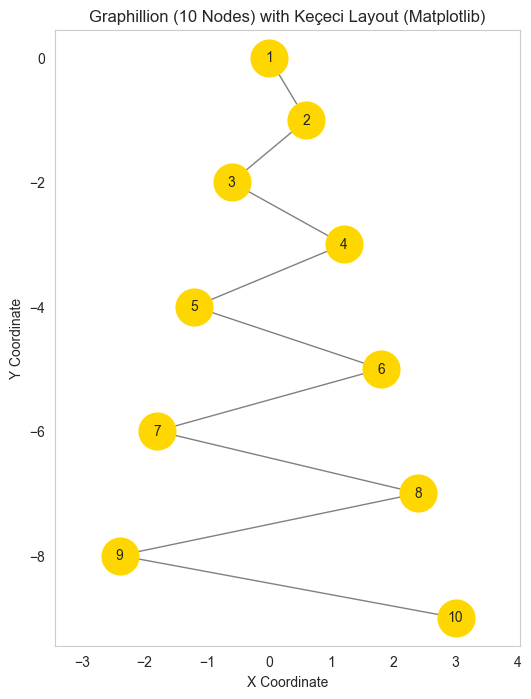


--- Graphillion Example Finished ---


In [10]:
#Example with Graphillion

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection # Efficient edge drawing
import math
import itertools # Graphillion might implicitly need itertools if find_max_node_id uses it internally
import graphillion as gg
import kececilayout as kl
import random


try:
    import kececilayout as kl
except ImportError:
    print("Error: 'kececi_layout.py' not found or could not be imported.")
    print("Please ensure the file containing kececi_layout_v4 is accessible.")
    exit()

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6, # Make the zigzag noticeable
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}
N_NODES = 10 # Number of nodes in the example graph (will be 1 to N_NODES)

# === Graphillion Example ===
try:
    import graphillion as gg
    print("\n--- Graphillion Example ---")

    # Define the universe of possible edges (Path graph, 1-based indexing common)
    universe = []
    # Edges (1,2), (2,3), ..., (N_NODES-1, N_NODES)
    for i in range(1, N_NODES):
        universe.append((i, i + 1))
    gg.GraphSet.set_universe(universe)
    max_node_gg = N_NODES # We know the max node ID for this simple case
    print(f"Graphillion universe defined: {len(universe)} edges, max node ID {max_node_gg}")

    # Generate a GraphSet object (can be empty, layout function uses the universe)
    # The layout function provided seems to derive nodes from the universe edges.
    gs = gg.GraphSet()

    # Calculate layout
    print("Calculating Keçeci Layout...")
    # Call the layout function; it should handle the Graphillion GraphSet object
    # and likely use 1-based indexing based on the universe.
    pos_gg = kl.kececi_layout_v4(gs, **LAYOUT_PARAMS)
    # print("Graphillion positions:", pos_gg) # Debug print if needed

    # Plot using Matplotlib directly (Graphillion has no plotting)
    print("Plotting graph using Matplotlib...")
    plt.figure(figsize=(6, 8))
    ax = plt.gca() # Get current axes

    # Node indices are expected to be 1, 2, ... N_NODES from the universe
    node_indices_gg = sorted(pos_gg.keys())

    # Check if all expected nodes (1 to N_NODES) have positions
    expected_nodes = set(range(1, N_NODES + 1))
    if not expected_nodes.issubset(set(node_indices_gg)):
         print(f"ERROR: Graphillion positions missing expected nodes. Found: {node_indices_gg}, Expected: {list(expected_nodes)}")
    else:
        # Draw nodes
        x_coords_gg = [pos_gg[i][0] for i in node_indices_gg]
        y_coords_gg = [pos_gg[i][1] for i in node_indices_gg]
        ax.scatter(x_coords_gg, y_coords_gg, s=700, c='gold', zorder=2, label='Nodes')

        # Draw labels (using the 1-based indices)
        for i in node_indices_gg:
            ax.text(pos_gg[i][0], pos_gg[i][1], str(i), ha='center', va='center', fontsize=10, zorder=3)

        # Draw edges using LineCollection (from the defined universe)
        edge_lines_gg = []
        for u, v in universe: # Use the universe edges
            if u in pos_gg and v in pos_gg:
                 edge_lines_gg.append([pos_gg[u], pos_gg[v]])
            else:
                 print(f"Warning: Position not found for universe edge ({u},{v}) in Graphillion.")

        if edge_lines_gg:
            lc_gg = LineCollection(edge_lines_gg, colors='gray', linewidths=1.0, zorder=1, label='Edges')
            ax.add_collection(lc_gg)

    plt.title(f"Graphillion ({N_NODES} Nodes) with Keçeci Layout (Matplotlib)") # Plot title
    plt.xlabel("X Coordinate") # X-axis label
    plt.ylabel("Y Coordinate") # Y-axis label
    plt.axis('equal')       # Ensure equal aspect ratio
    plt.grid(False)         # Ensure grid is off
    plt.show()              # Display the plot

except ImportError:
    print("Graphillion is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the Graphillion example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- Graphillion Example Finished ---")

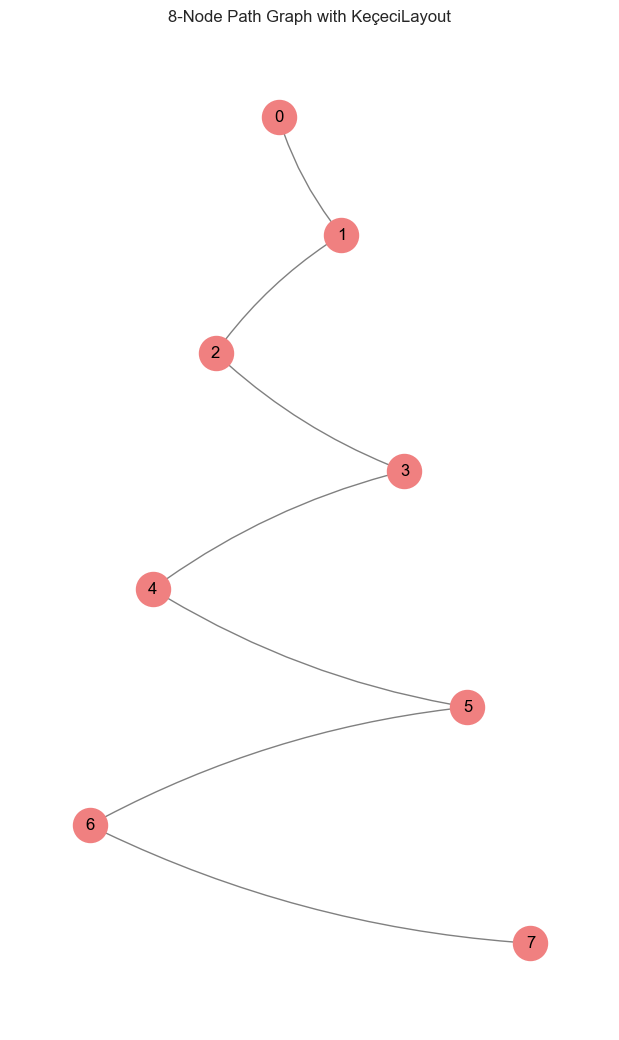

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import kececilayout as kl

G = nx.path_graph(8)  # 8-node linear graph

pos = kl.kececi_layout(
    G,
    primary_spacing=1.5,
    secondary_spacing=0.8,
    primary_direction='top_down',
    secondary_start='right',
    expanding=True
)

plt.figure(figsize=(6, 10))
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color='lightcoral',
    node_size=600,
    font_size=12,
    edge_color='gray',
    arrows=True,  # for FancyArrowPatch
    connectionstyle='arc3,rad=0.1'
)
plt.title("8-Node Path Graph with KeçeciLayout")
plt.axis('equal')
plt.show()


--- graph-tool Example ---
Calculating Keçeci Layout...
Plotting graph using Matplotlib...


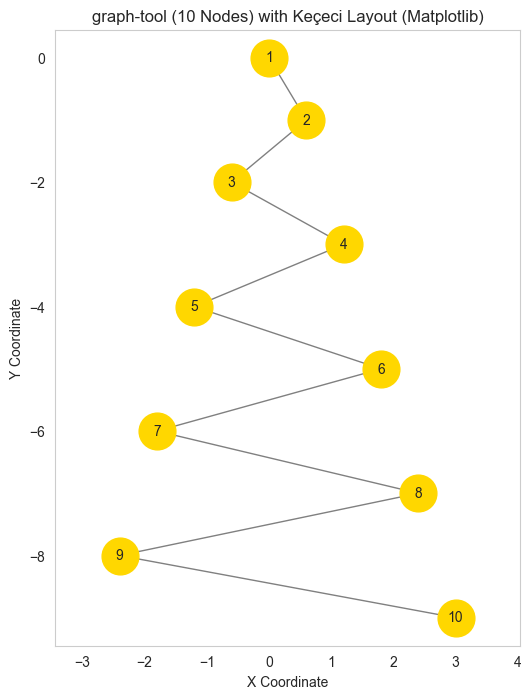


--- graph-tool Example Finished ---


In [12]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import graph_tool.all as gt
import kececilayout as kl

# --- General Layout Parameters ---
LAYOUT_PARAMS = {
    'primary_spacing': 1.0,
    'secondary_spacing': 0.6,
    'primary_direction': 'top_down',
    'secondary_start': 'right'
}

N_NODES = 10  # Number of nodes in the example graph

try:
    print("\n--- graph-tool Example ---")

    # Create a graph-tool Graph
    g = gt.Graph(directed=False)

    # Add nodes
    nodes = [g.add_vertex() for _ in range(N_NODES)]

    # Add edges (1-2, 2-3, ..., (N_NODES-1)-N_NODES)
    for i in range(N_NODES - 1):
        g.add_edge(nodes[i], nodes[i + 1])

    # Calculate layout using kececilayout_v4
    print("Calculating Keçeci Layout...")
    pos_gt = kl.kececi_layout(g, **LAYOUT_PARAMS)

    # Plot using Matplotlib
    print("Plotting graph using Matplotlib...")
    plt.figure(figsize=(6, 8))
    ax = plt.gca()

    # Extract node positions
    node_indices_gt = list(range(N_NODES))
    x_coords_gt = [pos_gt[i][0] for i in node_indices_gt]
    y_coords_gt = [pos_gt[i][1] for i in node_indices_gt]

    # Draw nodes
    ax.scatter(x_coords_gt, y_coords_gt, s=700, c='gold', zorder=2, label='Nodes')

    # Draw labels
    for i in node_indices_gt:
        ax.text(pos_gt[i][0], pos_gt[i][1], str(i + 1), ha='center', va='center', fontsize=10, zorder=3)

    # Draw edges
    edge_lines_gt = []
    for edge in g.edges():
        source = int(edge.source())
        target = int(edge.target())
        edge_lines_gt.append([pos_gt[source], pos_gt[target]])

    if edge_lines_gt:
        lc_gt = LineCollection(edge_lines_gt, colors='gray', linewidths=1.0, zorder=1, label='Edges')
        ax.add_collection(lc_gt)

    plt.title(f"graph-tool ({N_NODES} Nodes) with Keçeci Layout (Matplotlib)")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis('equal')
    plt.grid(False)
    plt.show()

except ImportError:
    print("graph-tool is not installed. Skipping this example.")
except Exception as e:
    print(f"An error occurred in the graph-tool example: {e}")
    import traceback
    traceback.print_exc()

print("\n--- graph-tool Example Finished ---")